<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Urban-Dictionary---EDA-and-Vector-Generation" data-toc-modified-id="Urban-Dictionary---EDA-and-Vector-Generation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Urban Dictionary - EDA and Vector Generation</a></span><ul class="toc-item"><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Import</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Pandas-Profiling---Data-Overview" data-toc-modified-id="Pandas-Profiling---Data-Overview-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Pandas Profiling - Data Overview</a></span></li><li><span><a href="#Words-by-Up-Votes" data-toc-modified-id="Words-by-Up-Votes-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Words by Up-Votes</a></span></li><li><span><a href="#Words-by-Down-Votes" data-toc-modified-id="Words-by-Down-Votes-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Words by Down-Votes</a></span></li><li><span><a href="#Words-by-Most-Definitions" data-toc-modified-id="Words-by-Most-Definitions-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Words by Most Definitions</a></span></li></ul></li><li><span><a href="#Generate-Vectors-and-Save" data-toc-modified-id="Generate-Vectors-and-Save-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Generate Vectors and Save</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# Urban Dictionary - EDA and Vector Generation

In [24]:
import pandas as pd
import numpy as np
import pandas_profiling
import regex as re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

## Data Import
Urban Dictionary corpus was gathered from a kaggle competition at the following link: https://www.kaggle.com/therohk/urban-dictionary-words-dataset/downloads/urban-dictionary-words-dataset.zip/2

In [3]:
# Referenced the following site to see how to drop rows with extra columns due to an unexpected comma
# https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

# Read in the Urban Dictionary word dump
df = pd.read_csv("../data/urbandict-word-def.csv", error_bad_lines=False)

b'Skipping line 5548: expected 6 fields, saw 7\nSkipping line 7202: expected 6 fields, saw 7\nSkipping line 9770: expected 6 fields, saw 7\nSkipping line 13383: expected 6 fields, saw 7\nSkipping line 20036: expected 6 fields, saw 7\nSkipping line 20152: expected 6 fields, saw 7\nSkipping line 21824: expected 6 fields, saw 8\nSkipping line 23872: expected 6 fields, saw 8\nSkipping line 25304: expected 6 fields, saw 7\nSkipping line 25691: expected 6 fields, saw 7\nSkipping line 25831: expected 6 fields, saw 7\nSkipping line 31045: expected 6 fields, saw 7\nSkipping line 35582: expected 6 fields, saw 7\nSkipping line 36116: expected 6 fields, saw 8\nSkipping line 36167: expected 6 fields, saw 7\nSkipping line 40251: expected 6 fields, saw 7\nSkipping line 40798: expected 6 fields, saw 7\nSkipping line 42050: expected 6 fields, saw 7\nSkipping line 46656: expected 6 fields, saw 7\nSkipping line 48634: expected 6 fields, saw 7\nSkipping line 49406: expected 6 fields, saw 7\nSkipping line 

b'Skipping line 788051: expected 6 fields, saw 7\nSkipping line 789961: expected 6 fields, saw 8\nSkipping line 808964: expected 6 fields, saw 7\nSkipping line 842267: expected 6 fields, saw 7\nSkipping line 847557: expected 6 fields, saw 8\nSkipping line 849856: expected 6 fields, saw 8\nSkipping line 850707: expected 6 fields, saw 7\nSkipping line 851927: expected 6 fields, saw 7\nSkipping line 852183: expected 6 fields, saw 7\nSkipping line 856596: expected 6 fields, saw 7\nSkipping line 876014: expected 6 fields, saw 7\nSkipping line 882607: expected 6 fields, saw 8\nSkipping line 891296: expected 6 fields, saw 7\nSkipping line 895387: expected 6 fields, saw 7\nSkipping line 896958: expected 6 fields, saw 7\nSkipping line 909668: expected 6 fields, saw 7\n'
b'Skipping line 917808: expected 6 fields, saw 8\nSkipping line 937052: expected 6 fields, saw 7\nSkipping line 944845: expected 6 fields, saw 7\nSkipping line 967450: expected 6 fields, saw 8\nSkipping line 968801: expected 6 f

b'Skipping line 2373281: expected 6 fields, saw 8\nSkipping line 2440666: expected 6 fields, saw 7\nSkipping line 2460887: expected 6 fields, saw 7\nSkipping line 2473628: expected 6 fields, saw 7\n'
b'Skipping line 2540377: expected 6 fields, saw 7\nSkipping line 2563082: expected 6 fields, saw 7\nSkipping line 2586627: expected 6 fields, saw 7\nSkipping line 2604741: expected 6 fields, saw 7\n'
C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning

In [4]:
df.head()

,word_id,word,up_votes,down_votes,author,definition
0,9.0,yayeeyay,19,27,dc397b2f,"affirmation; suggestion of encouragement, appr..."
1,7.0,Janky,296,255,dc397b2f,Undesirable; less-than optimum.
2,13.0,brutal,12,45,40ece1ef,anything that makes you sweat
3,14.0,skanky,9,48,485e4db7,"Anything of or pertaining to a $10,000 hooker."
4,22.0,hecka,8,18,b9dcf126,see synonyms at hella.


In [5]:
df.shape

(2606171, 6)

In [6]:
# Function to change all non-numerical values to np.nan from lesson 2.1-2.2 by Tim Book
def to_num(x):
    try:
        out = float(x)
    except:
        out = np.nan
    return out

In [7]:
# Change all non-numerical values to np.nan for "up_votes"
df["up_votes"] = df["up_votes"].apply(to_num)

In [8]:
# Change all non-numerical values to np.nan for "down_votes"
df["down_votes"] = df["down_votes"].apply(to_num)

In [9]:
# Drop all rows with missing values
df.dropna(inplace=True)

In [10]:
# Transform all the words into lower case
df['word'] = [r.lower() for r in df['word']]

In [11]:
# Replace the spaces in the 'word' column with an "_" and put it in a new column, so that phrases are retained
df['word_no_spaces'] = [r.replace(" ", "_") for r in df['word']]

In [12]:
# Transform all the definitions into lower case
df['definition'] = [r.lower() for r in df['definition']]

In [13]:
# Combine the word with the definition to train the word2vec model
df['word_def'] = df["word_no_spaces"] + " " + df["definition"]

In [14]:
df.head()

,word_id,word,up_votes,down_votes,author,definition,word_no_spaces,word_def
0,9.0,yayeeyay,19.0,27.0,dc397b2f,"affirmation; suggestion of encouragement, appr...",yayeeyay,yayeeyay affirmation; suggestion of encouragem...
1,7.0,janky,296.0,255.0,dc397b2f,undesirable; less-than optimum.,janky,janky undesirable; less-than optimum.
2,13.0,brutal,12.0,45.0,40ece1ef,anything that makes you sweat,brutal,brutal anything that makes you sweat
3,14.0,skanky,9.0,48.0,485e4db7,"anything of or pertaining to a $10,000 hooker.",skanky,"skanky anything of or pertaining to a $10,000 ..."
4,22.0,hecka,8.0,18.0,b9dcf126,see synonyms at hella.,hecka,hecka see synonyms at hella.


In [15]:
df.drop_duplicates(subset="word_def", inplace=True)

In [16]:
df.shape

(2592655, 8)

In [17]:
# Total rows dropped
2606171-df.shape[0]

13517

In [18]:
df.dtypes

word_id           float64
word               object
up_votes          float64
down_votes        float64
author             object
definition         object
word_no_spaces     object
word_def           object
dtype: object

In [19]:
df.sort_values(by='up_votes', ascending=False, inplace=True)

## Exploratory Data Analysis

### Pandas Profiling - Data Overview

In [20]:
pandas_profiling.ProfileReport(df)

### Words by Up-Votes

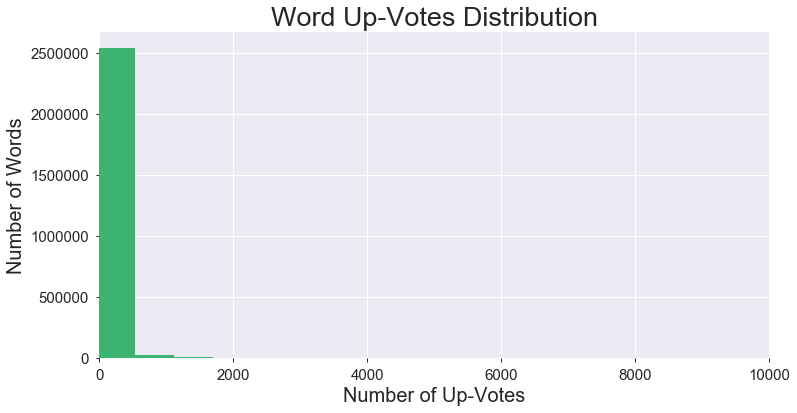

In [25]:
# Create a histogram of the up_votes
plt.figure(figsize=(12, 6))
plt.hist(df['up_votes'], bins=500, color='mediumseagreen')
plt.title("Word Up-Votes Distribution", fontsize = 27)
plt.ylabel("Number of Words", fontsize = 20)
plt.xlabel("Number of Up-Votes", fontsize = 20)
plt.xlim(left=0, right=10_000)
# plt.ylim(top=100_000)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

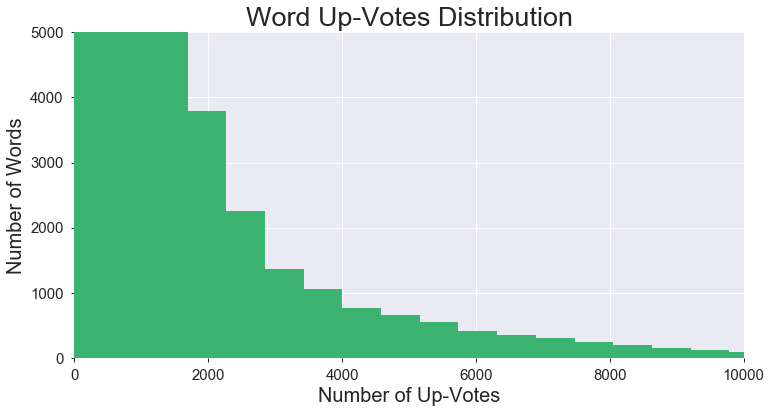

In [22]:
# Create a histogram of the up_votes - zoomed in
plt.figure(figsize=(12, 6))
plt.hist(df['up_votes'], bins=500, color='mediumseagreen')
plt.title("Word Up-Votes Distribution", fontsize = 27)
plt.ylabel("Number of Words", fontsize = 20)
plt.xlabel("Number of Up-Votes", fontsize = 20)
plt.xlim(left=0, right=10_000)
plt.ylim(top=5_000)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

In [23]:
# Top 10 words with the most up-votes
# words_most_ups = df.sort_values(by="up_votes").head(20)
df.sort_values(by="up_votes", ascending=False).head(20)

,word_id,word,up_votes,down_votes,author,definition,word_no_spaces,word_def
575828,1539760.0,sex,289002.0,79134.0,3624fb48,what kind of moron are you that you look up se...,sex,sex what kind of moron are you that you look u...
2465548,7910405.0,cartossin,270206.0,100377.0,c5a1894f,the act of giving up on both physical and ment...,cartossin,cartossin the act of giving up on both physica...
990126,2705928.0,hipster,182625.0,42696.0,8a5ef3c3,hipsters are a subculture of men and wome...,hipster,hipster hipsters are a subculture of men ...
750414,2001939.0,nigger,110245.0,20986.0,e618b258,a fully grown niglet,nigger,nigger a fully grown niglet
441475,1146634.0,sex,108716.0,57510.0,5ed4dfd3,"sex is like math: you add the bed, subtract th...",sex,"sex sex is like math: you add the bed, subtrac..."
728,1153.0,sex,100007.0,64827.0,6fc00870,"a painful activity in which a man, using the s...",sex,"sex a painful activity in which a man, using t..."
51019,124150.0,slut,94894.0,19969.0,9cb4d50e,a woman with the morals of a man,slut,slut a woman with the morals of a man
35969,88382.0,love,94664.0,23548.0,a6c97ba3,nature's way of tricking people into reproducing,love,love nature's way of tricking people into repr...
637707,1721109.0,woody,91820.0,1002.0,3ce30a7f,(n) a wooden roller coaster,woody,woody (n) a wooden roller coaster
1890101,5365083.0,gate rape,79211.0,9214.0,4b38a053,the tsa airport screening procedure.,gate_rape,gate_rape the tsa airport screening procedure.


In [24]:
# Top 500 words with the most upvotes when grouped by "word"
words_most_upvotes = pd.DataFrame(df.groupby("word")['up_votes'].sum().sort_values(ascending=False).head(500))

In [25]:
# Read in the bad-words csv downloaded from the Kaggle:
# https://www.kaggle.com/nicapotato/bad-bad-words
bad_words = pd.read_csv("../data/bad-words.csv", header=None)

In [26]:
# Remove all bad-words from list of words with the most upvotes
words_most_upvotes = words_most_upvotes[~words_most_upvotes.index.isin(bad_words[0])]

In [27]:
words_most_upvotes.drop([
                        "steak and blowjob day",
                        "gate rape",
                        "blow job",
                        "skeet",
                        "blue balls",
                        "fuckboy",
                        "fap",
                        "anal sex",
                        "hoe",
                        "fuck boy",
                        "guido",
                        "oral sex",
                        "porch monkey",
                        "cock block",
                        "creampie",
                        "basic bitch",
                        "george w. bush",
                        "69",
                        "50 cent",
                        "420",
                        "4chan",
                        "1337",
                        "<3",
                        "9/11",
                        "/b/",
                        "9gag",
                        "fo' shizzle my nizzle",
                        "that's what bp said",
                        "bill o'reilly",
                        "that's what she said"
                        ], inplace=True)

In [28]:
words_most_upvotes.shape

(378, 1)

In [29]:
words_most_upvotes

,up_votes
word,
obama,458831.0
feminist,407500.0
feminism,370672.0
hipster,332057.0
emo,324561.0
love,278749.0
cartossin,270206.0
barack obama,250593.0
swag,213158.0


In [30]:
# Save the words dataframe to a csv file
words_most_upvotes.to_csv('../data/urban_dictionary_words_most_upvotes.csv')

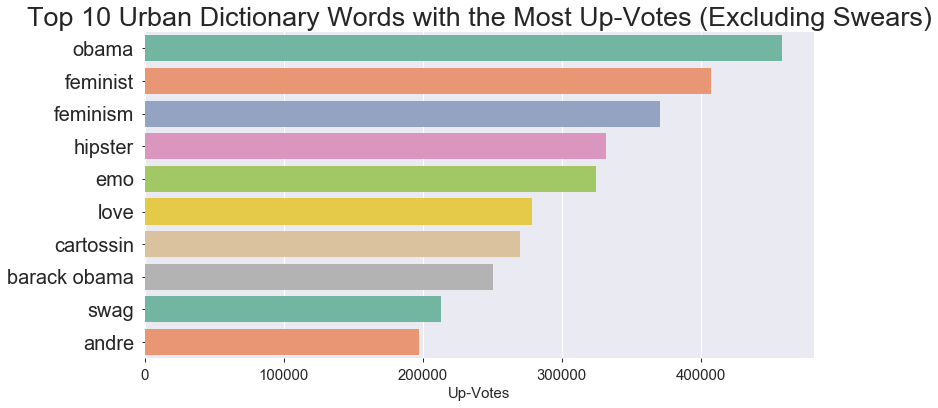

In [31]:
# Plot the top 10 words with the most up-votes
plt.figure(figsize=(12, 6))
sns.barplot(y=words_most_upvotes.head(10).index, x=words_most_upvotes["up_votes"].head(10), palette="Set2")
plt.title("Top 10 Urban Dictionary Words with the Most Up-Votes (Excluding Swears)", fontsize = 27)
plt.ylabel("", fontsize = 20)
plt.xlabel("Up-Votes", fontsize = 15)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15);

### Words by Down-Votes

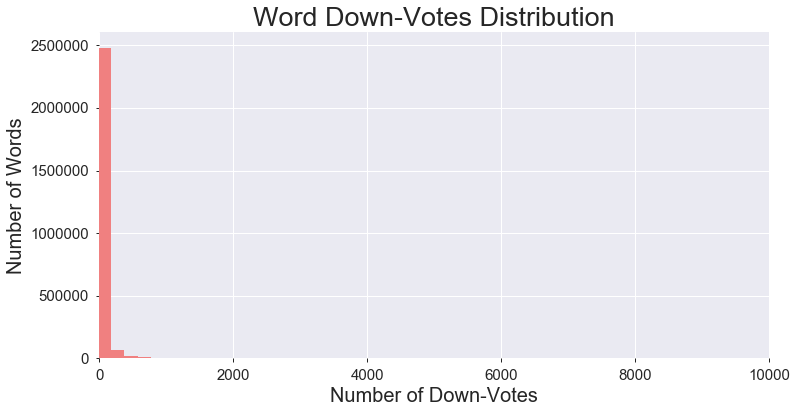

In [32]:
# Create a histogram of the down_votes
plt.figure(figsize=(12, 6))
plt.hist(df['down_votes'], bins=500, color='lightcoral')
plt.title("Word Down-Votes Distribution", fontsize = 27)
plt.ylabel("Number of Words", fontsize = 20)
plt.xlabel("Number of Down-Votes", fontsize = 20)
plt.xlim(left=0, right=10_000)
# plt.ylim(top=100_000)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

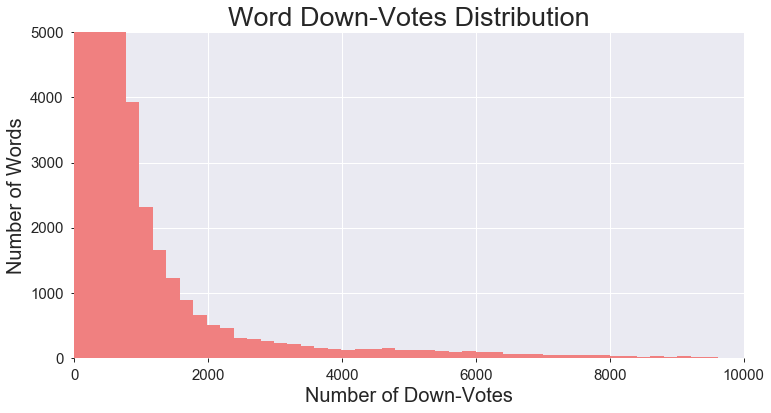

In [33]:
# Create a histogram of the down_votes - zoomed in
plt.figure(figsize=(12, 6))
plt.hist(df['down_votes'], bins=500, color='lightcoral')
plt.title("Word Down-Votes Distribution", fontsize = 27)
plt.ylabel("Number of Words", fontsize = 20)
plt.xlabel("Number of Down-Votes", fontsize = 20)
plt.xlim(left=0, right=10_000)
plt.ylim(top=5_000)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

### Words by Most Definitions

In [34]:
# Top 15 words with the most definitions
words_most_def = pd.DataFrame(df['word'].value_counts().head(19))

In [35]:
# Remove all bad-words from list of words with the most upvotes
words_most_def = words_most_def[~words_most_def.index.isin(bad_words[0])]

In [36]:
words_most_def

,word
emo,1175
love,1095
urban dictionary,629
canada's history,579
scene,526
school,516
swag,502
hipster,496
justin bieber,423
rap,411


In [37]:
df[df['word'] == "canada's history"]

,word_id,word,up_votes,down_votes,author,definition,word_no_spaces,word_def
1660315,4633480.0,canada's history,4986.0,1047.0,6c9df1b1,a sexual act so depraved it cannot be explaine...,canada's_history,canada's_history a sexual act so depraved it c...
1660312,4633441.0,canada's history,1814.0,965.0,c89f9eae,the most depraved sexual act known to mankind ...,canada's_history,canada's_history the most depraved sexual act ...
1660302,4633414.0,canada's history,1196.0,683.0,c3fff45f,a sexual act designed to tell a story through ...,canada's_history,canada's_history a sexual act designed to tell...
1663299,4649646.0,canada's history,760.0,462.0,7d70caef,"this terrifying, little-practiced sex act requ...",canada's_history,"canada's_history this terrifying, little-pract..."
1669249,4677150.0,canada's history,647.0,177.0,53355d05,a sex act performed often by members of canada...,canada's_history,canada's_history a sex act performed often by ...
1663309,4649690.0,canada's history,575.0,576.0,d1be3732,the sexual act in which you pour maple syrup i...,canada's_history,canada's_history the sexual act in which you p...
1660288,4633371.0,canada's history,460.0,469.0,b0f1ac6,the sexual act of covering moose antlers with ...,canada's_history,canada's_history the sexual act of covering mo...
1660261,4633121.0,canada's history,281.0,287.0,e3be0e35,is when you put a miniature #99 wayne gretzky ...,canada's_history,canada's_history is when you put a miniature #...
1664838,4656993.0,canada's history,216.0,223.0,98e351eb,"a sex act of the most depraved type, usually b...",canada's_history,canada's_history a sex act of the most deprave...
1664804,4656801.0,canada's history,178.0,179.0,22777668,"the 'canada's history' is an extremely vile, y...",canada's_history,canada's_history the 'canada's history' is an ...


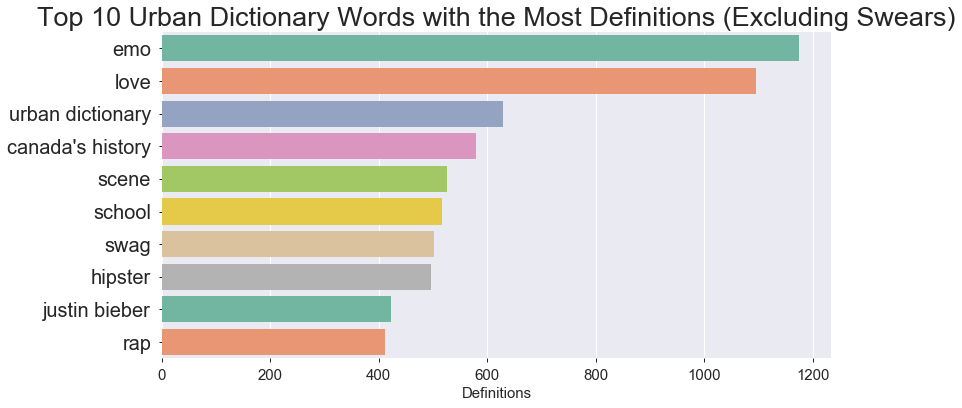

In [38]:
# Plot the top 10 words with the most definitions
plt.figure(figsize=(12, 6))
sns.barplot(y=words_most_def.index, x=words_most_def["word"], palette="Set2")
plt.title("Top 10 Urban Dictionary Words with the Most Definitions (Excluding Swears)", fontsize = 27)
# plt.ylabel("Definitions", fontsize = 20)
plt.xlabel("Definitions", fontsize = 15)
plt.yticks(fontsize=20)
plt.xticks(fontsize=15);

In [41]:
df[df['word'] == 'cartossin']

,word_id,word,up_votes,down_votes,author,definition,word_no_spaces,word_def
2465548,7910405.0,cartossin,270206.0,100377.0,c5a1894f,the act of giving up on both physical and ment...,cartossin,cartossin the act of giving up on both physica...


## Generate Vectors and Save

In [42]:
# Import stop words
from nltk.corpus import stopwords # Import the stop word list
english_stop_words = set(stopwords.words('english'))

In [43]:
# Function to create a nested list of tokenized words for each urban dictionary word

def clean_words(word_column):
    words_tokens = []
    for word in word_column:  
        if word not in english_stop_words:

            # regex ref: https://www.machinelearningplus.com/python/python-regex-tutorial-examples/
            words = re.sub('http\S+\s*', '', word)
            tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
            word_tokens = tokenizer.tokenize(words.lower())
            words_tokens.append(word_tokens)
    return words_tokens

In [44]:
X = clean_words(df['word_def'])

In [45]:
X[:5]

[['sex',
  'what',
  'kind',
  'of',
  'moron',
  'are',
  'you',
  'that',
  'you',
  'look',
  'up',
  'sex',
  'in',
  'the',
  'urban',
  'dictionary'],
 ['cartossin',
  'the',
  'act',
  'of',
  'giving',
  'up',
  'on',
  'both',
  'physical',
  'and',
  'mental',
  'growth'],
 ['hipster',
  'hipsters',
  'are',
  'subculture',
  'of',
  'men',
  'and',
  'women',
  'typically',
  'in',
  'their',
  'and',
  'that',
  'value',
  'independent',
  'thinking',
  'counter',
  'culture',
  'progressive',
  'politics',
  'an',
  'appreciation',
  'of',
  'art',
  'and',
  'indie',
  'rock',
  'creativity',
  'intelligence',
  'and',
  'witty',
  'banter',
  'the',
  'greatest',
  'concentrations',
  'of',
  'hipsters',
  'can',
  'be',
  'found',
  'living',
  'in',
  'the',
  'williamsburg',
  'wicker',
  'park',
  'and',
  'mission',
  'district',
  'neighborhoods',
  'of',
  'major',
  'cosmopolitan',
  'centers',
  'such',
  'as',
  'new',
  'york',
  'chicago',
  'and',
  'san',
 

In [46]:
# Create a timer to see how long the model takes to instantiate
# Referenced https://pythonhow.com/measure-execution-time-python-code/
import time
start = time.time()

# Instantiate a model
w2v = Word2Vec(X,     # Corpus of data.
               size=300,    # How many dimensions do you want in your word vector?
               window=5,    # How many "context words" do you want?
               min_count=1, # Ignores words below this threshold.
               sg=1,        # SG = 1 uses SkipGram, SG = 0 uses CBOW (default).
               workers=4,   # Number of "worker threads" to use (parallelizes process).
               hs=1, 
               negative=0);   

end = time.time()
print(end - start)

3305.287436723709


In [47]:
# Create word vectors file
word_vectors = w2v.wv

In [48]:
# Referenced the following on how to save the word_vectors
# https://stackoverflow.com/questions/27324292/convert-word2vec-bin-file-to-text
word_vectors.save_word2vec_format("../data/urban_dictionary_skipgram.vec")

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## References
- https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
- https://www.machinelearningplus.com/python/python-regex-tutorial-examples/
- https://www.kaggle.com/nicapotato/bad-bad-words
- https://stackoverflow.com/questions/27324292/convert-word2vec-bin-file-to-text
- https://pythonhow.com/measure-execution-time-python-code/